<a href="https://colab.research.google.com/github/saraghamloush/MiniProject/blob/master/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Mini Project</h1>
Abed El Kader El Shaar , Sara Ghamloush</h1>

<h1>Car price prediction</h1>

<h3>Importing libraries</h3>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

<h3>Importing the dataset</h3>

In [ ]:
df = pd.read_csv("CarPrice_Dataset_GDSC_article.csv")
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<h3>Extracting the numerical features</h3>

In [ ]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes!="O"]
numerical_feature

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

<h3>Creating the plots for data visualization

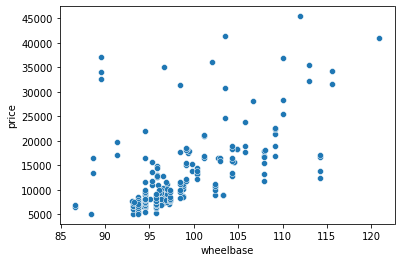

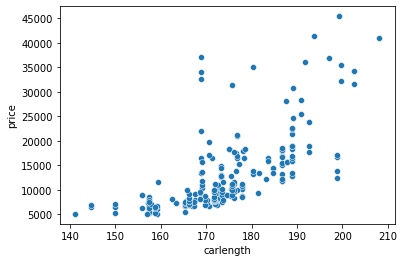

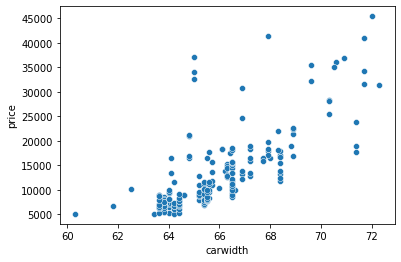

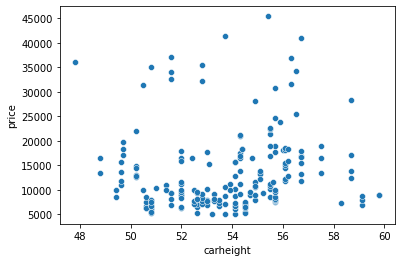

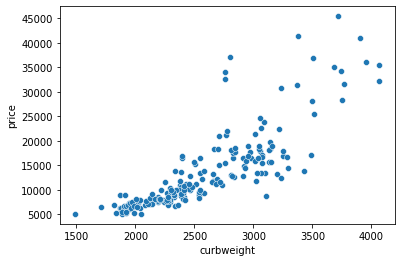

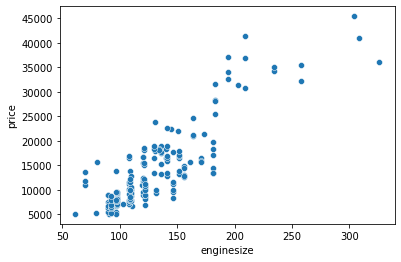

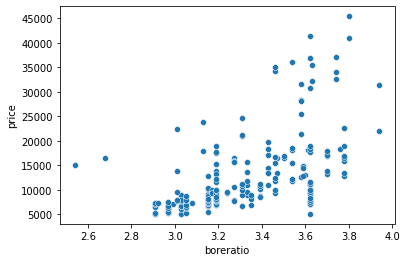

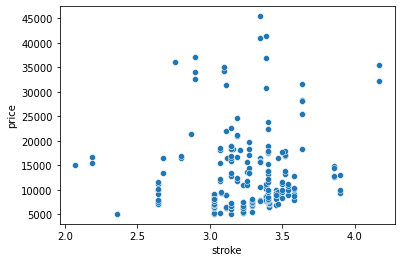

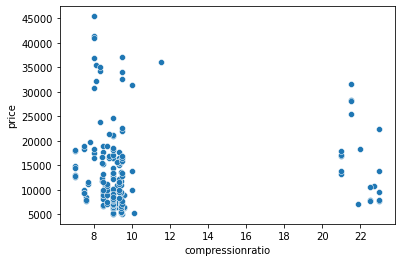

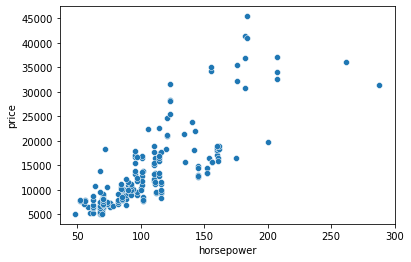

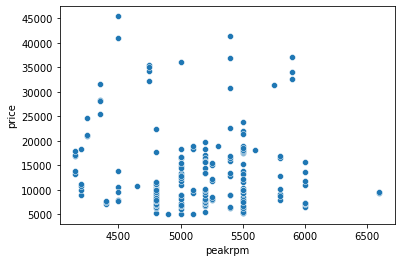

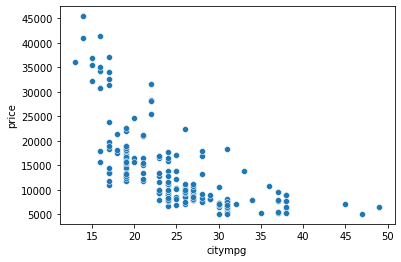

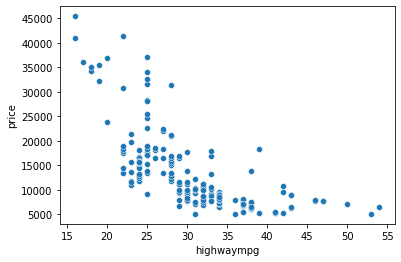

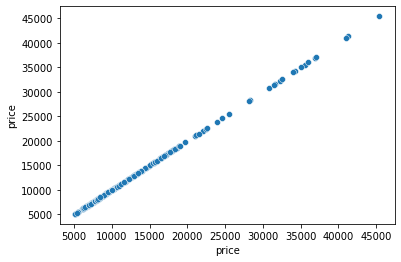

In [ ]:
for feature in numerical_feature:
    sns.scatterplot(x = df[feature], y = df['price'])
    plt.show()

<h3>Dropping useless columns</h3>

In [ ]:
df = df.drop(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'doornumber', 'cylindernumber'], axis=1)
df = df.drop(['peakrpm', 'compressionratio', 'peakrpm', 'stroke', 'carheight', 'wheelbase'], axis=1)

<h3>Data normalization</h3>

In [ ]:
df['enginesize'] = np.log(df['enginesize'])

In [ ]:
scaler=MinMaxScaler()
scaler.fit(df)
dataset=pd.DataFrame(scaler.transform(df),columns=df.columns)
dataset.head()

,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,0.413433,0.316667,0.411171,0.451462,0.664286,0.262500,0.222222,0.289474,0.207959
1,0.413433,0.316667,0.411171,0.451462,0.664286,0.262500,0.222222,0.289474,0.282558
2,0.449254,0.433333,0.517843,0.544746,0.100000,0.441667,0.166667,0.263158,0.282558
3,0.529851,0.491667,0.329325,0.346340,0.464286,0.225000,0.305556,0.368421,0.219254
4,0.529851,0.508333,0.518231,0.478383,0.464286,0.279167,0.138889,0.157895,0.306142


<h3>Training set and test set split</h3>

In [ ]:
X=df.drop(['price'], axis=1)
y=df['price']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

<h3>Model creation and training</h3>

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predLR = lr.predict(X_test)


<h3>Model evaluation</h3>

In [ ]:
r2_score(y_test, y_predLR)

0.8453707785571698